<a href="https://colab.research.google.com/github/Viveksoni22/Netflix-Movie-Data-Analysis-Project/blob/main/Netflix_Movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movie Data Analysis**

In [48]:
#Import The Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Upload And read Movie Data
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [50]:
# Fetch the inforation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [51]:
#Gather the infor of genre Attribute
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [52]:
#Find Duplicate Values of the dataset
df.duplicated().sum()

np.int64(0)

In [53]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [54]:
#Exploration Summary
# 1. Wee have dataframe consisting of 9827 rows and 9 columns.
# 2. Our dataset looks a bit tidy with no nans non duplicated values.
# 3. Release_Date column needs to be casted into date time and to extract only the year value.
# 4. Overview, Original_Langugage and Poster_Url wouldn't be so useful during Anaysis, so we'll drop them
# 5. There is noticable outliers in popularity column.
# 6. Vote_Average better be categorised for proper Analysis.
# 7. Genre column has comma seperated value and white spaces that needds to be handle and casted intto category.

In [55]:
#casted into date time
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [56]:
#extract only the year value
df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"].dtypes)

int32


In [57]:
#show only year
df["Release_Date"].head()

,Release_Date
0,2021
1,2022
2,2022
3,2021
4,2021


In [58]:
# drop column Overview, Original_Language,	Poster_Url

cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
#df.drop(colums = cols,inplace =True)
#df.colums
df = df.drop(columns=cols_to_drop, errors='ignore')
print(df.head())

   Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War  


In [59]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [60]:
#Categoring Vote_Average column
# we would cut the Vote_Average values and make 4 categories: Popular, Average, Below_AVG, Not_popular.
# to describe it more using categorize_col() function provided -

def categorize_col(df,col,labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
  df[col] = pd.cut(df[col],edges,labels= labels,duplicates='drop')
  return df

#calling the categorize_col() Function

labels = ['Popular', 'Average', 'Below_AVG', 'Not_popular']
df = categorize_col(df,'Vote_Average',labels)
df['Vote_Count'].unique()
# updated Dataset
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Not_popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Not_popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Below_AVG,"Action, Adventure, Thriller, War"


In [61]:
#Print all the values of the Vote_Averge
df['Vote_Average'].value_counts()

,count
Vote_Average,
Popular,2467
Not_popular,2450
Below_AVG,2412
Average,2398


In [62]:
df.dropna(inplace = True)
df.isna().sum()
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Not_popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Not_popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Below_AVG,"Action, Adventure, Thriller, War"


In [63]:
# We'd Split Genre into a list and than explode our dataframe to have only one Genre per row for each Movie

df['Genre'] = df['Genre'].str.split(", ")
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_popular,Crime
4,2022,The Batman,3827.658,1151,Not_popular,Mystery


In [64]:
# Casting Column into Category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [65]:
df.info()
#Now we have 25552 entries And total 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [66]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [67]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_popular,Crime
4,2022,The Batman,3827.658,1151,Not_popular,Mystery


## ***Data Visualiozation***

In [68]:
sns.set_style('whitegrid')

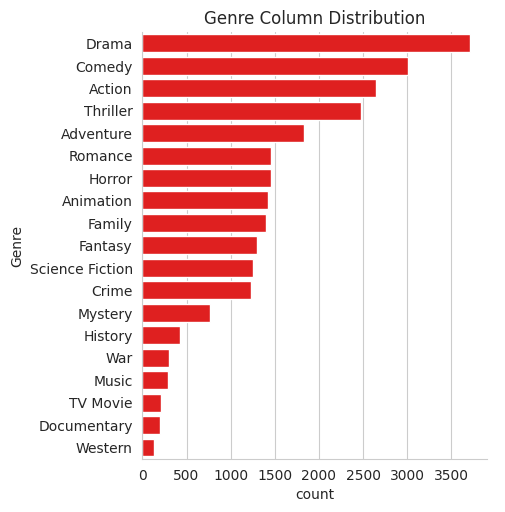

In [69]:
# Q1. - What is the most frequent Genre of movies released on Netflix ?

df['Genre'].describe()
sns.catplot( y = 'Genre', data= df, kind= 'count', order= df['Genre'].value_counts().index, color= 'red')
plt.title('Genre Column Distribution')
plt.show()

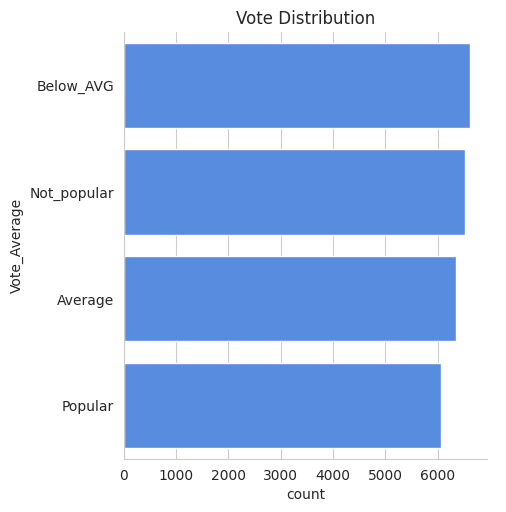

In [70]:
#  Q2. - Which has Highest votes in Vote_Average Column ?

df.head()
sns.catplot(y = 'Vote_Average', data= df, kind= 'count', order= df['Vote_Average'].value_counts().index, color= '#4287f5')
plt.title('Vote Distribution')
plt.show()

In [71]:
# Q3. - What movie gets the highest popularity? And what's its Genre?

popular_movie = df.loc[df['Popularity'].idxmax()]
print(f"The movie with the highest popularity is: {popular_movie['Title']}")
print(f"Its genre is: {popular_movie['Genre']}")

The movie with the highest popularity is: Spider-Man: No Way Home
Its genre is: Action


In [72]:
# Q4. - What movie gets the Lowest popularity? And what's its Genre?

lowest_popular_movie = df.loc[df['Popularity'].idxmin()]
print(f"The movie with the lowest popularity is: {lowest_popular_movie['Title']}")
print(f"Its genre is: {lowest_popular_movie['Genre']}")

The movie with the lowest popularity is: The United States vs. Billie Holiday
Its genre is: Music


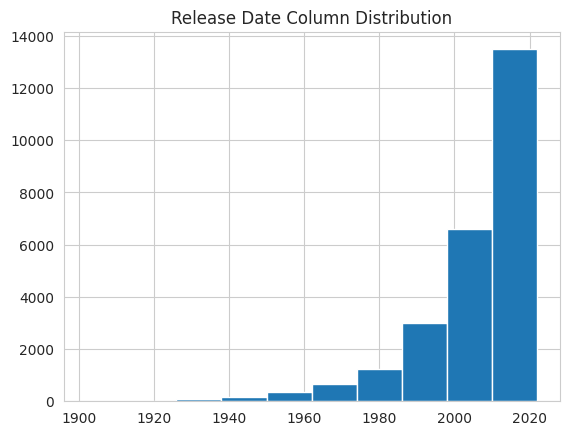

In [73]:
# Q5. - Which year has the most Filmmed Movie?

df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()